# Polynomial Kernel

## 1. Introduction

In the previous class we saw that a data set will not always be linearly separable, so it is necessary to use more complex algorithms in the data training and classification process. Support Vector Machines is a supervised learning algorithm that is used in many classification and regression problems, including medical applications in signal processing, natural language processing, and image and speech recognition.

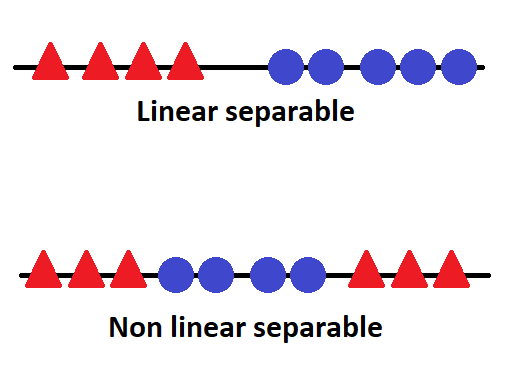

The goal of the SVM algorithm is to find a hyperplane that best separates two different classes of data points. "Best separates" implies the hyperplane with the widest margin between the two classes. Support vectors refer to a subset of the training observations that identify the location of the separation hyperplane.


## 2. ¿What is a kernel?

A kernel is a function $k$ that for all $\mathbf{x}, \mathbf{y} \in$ $X$ satisfies
$$
k(\mathbf{x}, \mathbf{y})=\langle\phi(\mathbf{x}), \phi(\mathbf{y})\rangle = \phi(\mathbf{x})^{T} \phi(\mathbf{y}),
$$
where $\phi$ is a mapping from $X$ to an (inner product) feature space $F$
$$
\phi: \mathbf{x} \longmapsto \phi(\mathbf{x}) \in F .
$$

*J. S Taylor, N. Cristianini. Kernel Methods for Pattern Analysis. Cambridge University Press.*

This means that if $k(\mathbf{x}, \mathbf{y})$ is a symmetric, continuous, positive defined function in an input space $X$, then there exists a higher-dimensional feature space $F$ and a function $\phi(\mathbf{x})$ that maps each point $\mathbf{x}$ in the input space to the higher-dimensional feature space.

The kernel function has to be:
+ Symmetric: Symmetry guarantees that $k(\mathbf{x}, \mathbf{y})$ is equal to $k(\mathbf{y}, \mathbf{x})$, i.e., that the similarity between x and y is the same as the similarity between y and x. Similarity refers to the measure of how close two input vectors are in a higher dimensional feature space.
+ Continous: Continuity ensures that the kernel function is smooth and has no sharp discontinuities, which can be counterproductive in the training and modeling process.
+ Positive defined: The definite positivity property guarantees that $k(\mathbf{x}, \mathbf{x})$ is always greater than or equal to zero, which means that the similarity of a point to itself is always positive.

The most well-known kernels are:
+ Linear kernel
+ Gaussian Kernel
+ Laplacian Kernel
+ Polynomial Kernel
+ Sigmoid Kernel
+ Cosine Kernel
+ Chi-squared Kernel

https://arxiv.org/pdf/2106.08443.pdf

## 3. The Kernel Trick

Suppose we have an optimization algorithm formulated in such a way that the samples or data vectors do not appear in the formulation as variables by themselves, but as inner products between these vectors in the input space X. By kernelizing, i.e. by transforming such dot products into the higher dimensionality feature space, we have the dot products of the  $\phi(\mathbf{x})$ function applied to each of the vectors of the space X, but this is equivalent to the definition of the kernel function $k(\mathbf{x}, \mathbf{y})$ applied to the vectors of the input space. Then, if we want to take a low dimensionality X-space to the high dimensionality feature space it is not necessary to know or explicitly compute the feature transformation  $\phi(\mathbf{x})$ to use the kernel. This is known as the kernel trick:

$$
\boldsymbol{x}^{\top} \boldsymbol{x} \mapsto {\phi}(\boldsymbol{x})^{\top} {\phi}(\boldsymbol{x}) {=} k(\boldsymbol{x}, \boldsymbol{x}) .
$$

Let's see an example: 

Suppose a function $k(\mathbf{x}, \mathbf{y})$, we do not yet know if it is a kernel function since we do not know if it is equivalent to the dot product of the transformations of x and x' in some space. The input space is two dimensional, so $\mathbf{x}=(x_1, x_2)$ and $\mathbf{y}=(y_1, y_2)$, then we have:

$$
\begin{aligned}
k\left(\mathbf{x}, \mathbf{y}\right) & =\left(1+\mathbf{x}^{\top} \mathbf{y}\right)^2 \\
& =\left(1+x_1 y_1+x_2 y_2\right)^2 \\
& =1+x_1^2 y_1^{2}+x_2^2 y_2^{2}+2 x_1 y_1+2 x_2 y_2+2 x_1 y_1 x_2 y_2
\end{aligned}
$$

The factor 2 in the last terms of the result can be a bit confusing, but this result is familiar and can be interpreted as a dot product writting the vectors just with a scale

$$
\begin{aligned}
& \left(1, x_1^2, x_2^2, \sqrt{2} x_1, \sqrt{2} x_2, \sqrt{2} x_1 x_2\right) \\
& \left(1, y_1^{2}, y_2^{2}, \sqrt{2} y_1, \sqrt{2} y_2, \sqrt{2} y_1 y_2\right)
\end{aligned}
$$

such that their dot product is 

$$
\left(1, x_1^2, x_2^2, \sqrt{2} x_1, \sqrt{2} x_2, \sqrt{2} x_1 x_2\right) \cdot \left(1, y_1^{2}, y_2^{2}, \sqrt{2} y_1, \sqrt{2} y_2, \sqrt{2} y_1 y_2\right) = \\
1+x_1^2 y_1^{2}+x_2^2 y_2^{2}+2 x_1 y_1+2 x_2 y_2+2 x_1 y_1 x_2 y_2 
$$

which is equal to the function $k(\mathbf{x}, \mathbf{y})$. Then we can say that $k(\mathbf{x}, \mathbf{y})$ is a kernel function because is equal to the inner product of two vectors from a two dimensional space to a five dimensional space but we didn´t make the transformation in an explicit form. 

$$
\begin{aligned}
k\left(\mathbf{x}, \mathbf{y}\right) & =\left(1+\mathbf{x}^{\top} \mathbf{y}\right)^2 \\
& =\left(1+x_1 y_1+x_2 y_2\right)^2 \\
& =1+x_1^2 y_1^{2}+x_2^2 y_2^{2}+2 x_1 y_1+2 x_2 y_2+2 x_1 y_1 x_2 y_2 \\
& =\left(1, x_1^2, x_2^2, \sqrt{2} x_1, \sqrt{2} x_2, \sqrt{2} x_1 x_2\right) \cdot \left(1, y_1^{2}, y_2^{2}, \sqrt{2} y_1, \sqrt{2} y_2, \sqrt{2} y_1 y_2\right)\\
& = \phi(\mathbf{x}) \phi(\mathbf{y})
\end{aligned}
$$

This is the kernel trick, to use a suitable kernel function instead of explicitly calculating the feature vectors in the higher dimensional space by a transformation. 

*Think of it this way. I am a guardian of the features space $F$. I'm closing the door. Nobody has access to the features space.*

*You come to me with requests... If you give me an x and ask me, what is the transformation, that's a big demand. I have to hand you a big $\phi(x)$. And I may not allow that.*

*But let's say that all I'm willing to give you are inner products. You give me x and y, I close the door, do my thing, and come back with a number, which is the inner product between $\phi(x)$ and $\phi(y)$, without actually telling you what $\phi(x)$ and $\phi(y)$ were. That would be a simple operation.*

*Lecture 15 of 18 of Caltech's Machine Learning Course - CS 156 by Professor Yaser Abu-Mostafa.*

## The polynomial kernel

A polynomial kernel will be a kernel function involving terms with positive integer exponents. It is usually defined as:

$$
k(\boldsymbol{x}, \boldsymbol{y}):=\left(\gamma \boldsymbol{x}^{\top} \boldsymbol{y}+r\right)^d
$$

where $\gamma>0$ is the slope and $c$ is the intercept. Some proper values for these parameters are $\gamma=1 / d$ and $r=1$ where $d$ is the degree.

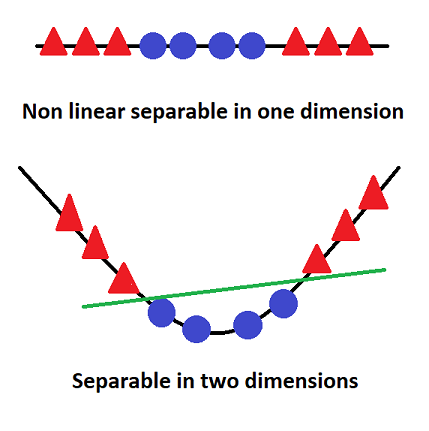

In this simple but graphic example we can see that if we add a feature $x^{2}$, we can separate the classes in a two dimensional space.

$\gamma$, $r$ and $d$ are parameters of the polynomial kernel that can be adjusted to obtain a better prediction result once the model is trained: 
+ The degree $d$ of the polynomial can be used to control the complexity of the model. A high degree $d$ will result in a more complex model that may overfit the data, while a low degree $d$ will result in a simpler model that may underfit the data.
+ The $\gamma$ parameter controls the influence of each training example on the prediction. Low values of $\gamma$ mean that the model will consider a large area around each example as support vector, leading to smooth decision boundaries. High values of $\gamma$ make the model fit the training data more closely, which can lead to overfitting.
+ The parameter $r$ is the independent term in the kernel function. Adjusting $r$ can be useful to center the decision boundary around a certain value.

The optimal values for $\gamma$, $r$ and $d$ can be found by applying cross validation and grid search.

Let's see an example using sklearn.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X,y = make_circles(90, factor=0.2, noise=0.1, random_state=0) 
#noise = standard deviation of Gaussian noise added in data. 
#factor = scale factor between the two circles

In [13]:
df = pd.DataFrame()
df['x1'] = X[:,0]
df['x2'] = X[:,1]
df['Class'] = y

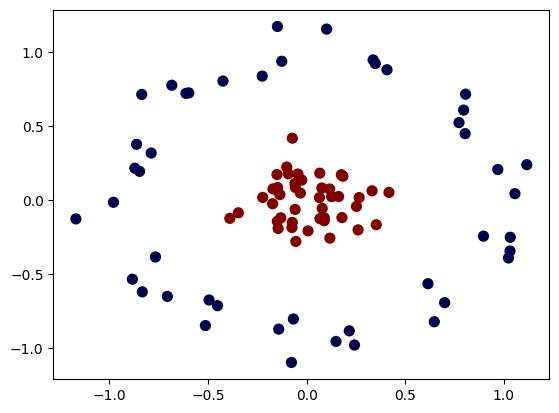

In [14]:
plt.scatter(x=df['x1'], y=df['x2'], c=df['Class'], s=50, cmap='seismic')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

polynomial = SVC(kernel='poly', random_state = 0)

training_X = polynomial.fit(X_train,y_train)
test_X = polynomial.score(X_test, y_test)

result_X = cross_val_score(polynomial, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

Test X: 0.2962962962962963
Cross validation X:  [0.53846154 0.61538462 0.61538462 0.58333333 0.66666667]
Mean X:  0.6038461538461538


In [20]:
parameters = {'degree': [2, 3, 4],
              'gamma': [0.1, 1, 10],
              'coef0': [0, 1, 2]}

polynomial = SVC(kernel='poly', random_state = 0)

searching_X = GridSearchCV(polynomial, parameters, cv=5)
searching_X.fit(X_train, y_train)

print("Best parameters for X: ", searching_X.best_params_)
print("Mean for X: ", searching_X.best_score_)

y_predicted = searching_X.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)

Best parameters for X:  {'coef0': 0, 'degree': 2, 'gamma': 1}
Mean for X:  1.0


In [21]:
polynomial = SVC(kernel='poly', random_state = 0, degree=2, gamma=1, coef0=0)

training_X = polynomial.fit(X_train,y_train)
test_X = polynomial.score(X_test, y_test)

result_X = cross_val_score(polynomial, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

Test X: 1.0
Cross validation X:  [1. 1. 1. 1. 1.]
Mean X:  1.0


Thus, the polynomial kernel function that correctly separates the data in a two-dimensional space is 
$$
k(\boldsymbol{x_1}, \boldsymbol{x_2})=\left(\boldsymbol{x_1}^{\top} \boldsymbol{x_2}\right)^2
$$


## ¿Why does this works?

Because the problem we want to solve is a optimization with a constrain: An optimization because we want a decision boundary with a maximized margin that separes the classes. Constrained because we don´t want samples an new data inside the margin, this means that the support vectors must be out of the margin. This problem is solved using Lagrange Multipliers:

$$
\mathcal{L}(\boldsymbol{\alpha})=\sum_i \alpha_i-\frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \overrightarrow{x_{S V i}} \cdot \overrightarrow{x_{S V j}}
$$

The function to optimize is a lagrangian that only depends on the inner products of the support vectors. This inner product is equivalent via transformation to the inner product of the transformation of this vectors in a higher dimensional $Z$ space where the data may be separable:

$$
\mathcal{L}(\boldsymbol{\alpha})=\sum_i \alpha_i-\frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \mathbf{z}_i^{\top} \mathbf{z}_j
$$

and by the Mercer theorem we know that this last inner product doesn´t have to be calculted in a explicit form because is equivalent to a kernel function applied to the vectors. Also the constrains of the problem depends only on the inner products of the support vectors:

$$
g(\mathbf{x})=\operatorname{sign}\left(\mathbf{w}^{\top} \mathbf{z}+b\right)
$$
where $$\mathbf{w}=\sum_{\mathrm{z_n \ is \ a \ SV} }\alpha_n y_n \mathbf{z}_n$$
and $$b: \quad y_m\left(\mathbf{w}^{\top} \mathbf{z}_m+b\right)=1$$
